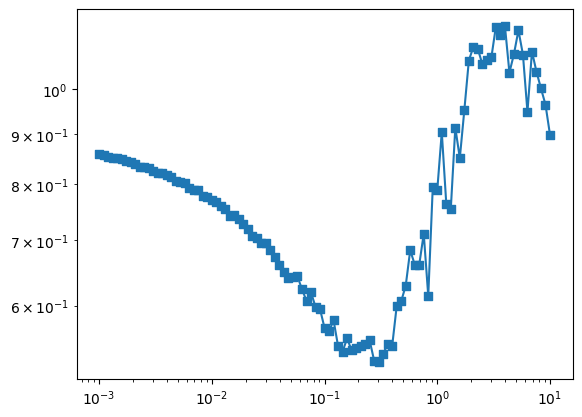

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def iterate(dt, D,x):
  return x + sqrt(2*D*dt)*np.random.normal(0, 1)

X = np.zeros((1001,500,101))
Y = np.zeros((1001,500,101))
for k in range (0,101):
  for j in range (0, 500):
    for i in range(0, 1000):
      X[i+1][j][k] = iterate(0.01, pow(10,(-3+0.04*k)),X[i][j][k])
      Y[i+1][j][k] = iterate(0.01, pow(10,(-3+0.04*k)),Y[i][j][k])

X_1 = np.zeros((1001,500,101,11))
Y_1 = np.zeros((1001,500,101,11))
for i in range (0,500):
  for j in range (0,101):
    for k in range (0,11):
      X_1[0][i][j][k] = cos(2*pi*k/5)
      Y_1[0][i][j][k] = sin(2*pi*k/5)
T = np.zeros((101,500))
for k in range (0,101):
  for j in range (0, 500):
    for i in range(0, 1000):
      checkcaught=False
      for l in range (0,11):
        if sqrt(pow((X[i][j][k]-X_1[i][j][k][0]),2) + pow((Y[i][j][k]-Y_1[i][j][k][0]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][1]),2) + pow((Y[i][j][k]-Y_1[i][j][k][1]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][2]),2) + pow((Y[i][j][k]-Y_1[i][j][k][2]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][3]),2) + pow((Y[i][j][k]-Y_1[i][j][k][3]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][4]),2) + pow((Y[i][j][k]-Y_1[i][j][k][4]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][5]),2) + pow((Y[i][j][k]-Y_1[i][j][k][5]),2))  < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][6]),2) + pow((Y[i][j][k]-Y_1[i][j][k][6]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][7]),2) + pow((Y[i][j][k]-Y_1[i][j][k][7]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][8]),2) + pow((Y[i][j][k]-Y_1[i][j][k][8]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][9]),2) + pow((Y[i][j][k]-Y_1[i][j][k][9]),2)) < 0.1 or sqrt(pow((X[i][j][k]-X_1[i][j][k][10]),2) + pow((Y[i][j][k]-Y_1[i][j][k][10]),2))  < 0.1 :
          T[k][j]=i*0.01
          checkcaught=True
          break
        else :
          X_1[i+1][j][k][l] = X_1[i][j][k][l] + (0.01*(X[i][j][k]-X_1[i][j][k][l])/sqrt(pow((X[i][j][k]-X_1[i][j][k][l]),2) + pow((Y[i][j][k]-Y_1[i][j][k][l]),2)))
          Y_1[i+1][j][k][l] = Y_1[i][j][k][l] + (0.01*(Y[i][j][k]-Y_1[i][j][k][l])/sqrt(pow((X[i][j][k]-X_1[i][j][k][l]),2) + pow((Y[i][j][k]-Y_1[i][j][k][l]),2)))
      if checkcaught==True:
        break

Mean_T = np.zeros((101))
for i in range (0,101): 
  sum = 0
  for j in range (0,500):
    sum = sum + T[i][j]
  Mean_T[i] = sum/500   

D = np.zeros((101))
for i in range (0,101):
  D[i] = pow(10,(-3+0.04*i))
plt.xscale("log")
plt.yscale("log")
plt.scatter(D, Mean_T, marker='s')
plt.plot(D, Mean_T)
